---
<div align="center">

# Particle Swarm Optimization with Pyswarms
</div>

---

In [1]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions.single_obj import (sphere, rastrigin, rosenbrock)
from pyswarms.utils.plotters import (plot_contour, plot_surface, plot_cost_history)
from pyswarms.utils.plotters.formatters import (Designer, Mesher)

In [3]:
# Define the parameters used in PSO within a config dictionary
config = {'d':2,
          'w':0.5,
          'c1':1.5,
          'c2':0.8,
          'n_particles':20,
          'n_iterations':300}

# Define the bounds for the experiment
lim = ([-5.12, -5.12], [5.12, 5.12])

---
<div align="center">

## Sphere Function
</div>

---

In [4]:
# Create a new instance of a Optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=config['n_particles'], dimensions=config['d'], options=config, bounds=lim)

# Perform Optimization
cost, pos = optimizer.optimize(sphere, iters=config['n_iterations'])

2024-09-16 23:00:52,366 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'d': 2, 'w': 0.5, 'c1': 1.5, 'c2': 0.8, 'n_particles': 20, 'n_iterations': 300}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|300/300, best_cost=4.55e-79
2024-09-16 23:00:52,914 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.548738073812989e-79, best pos: [-4.39841202e-40 -5.11286147e-40]


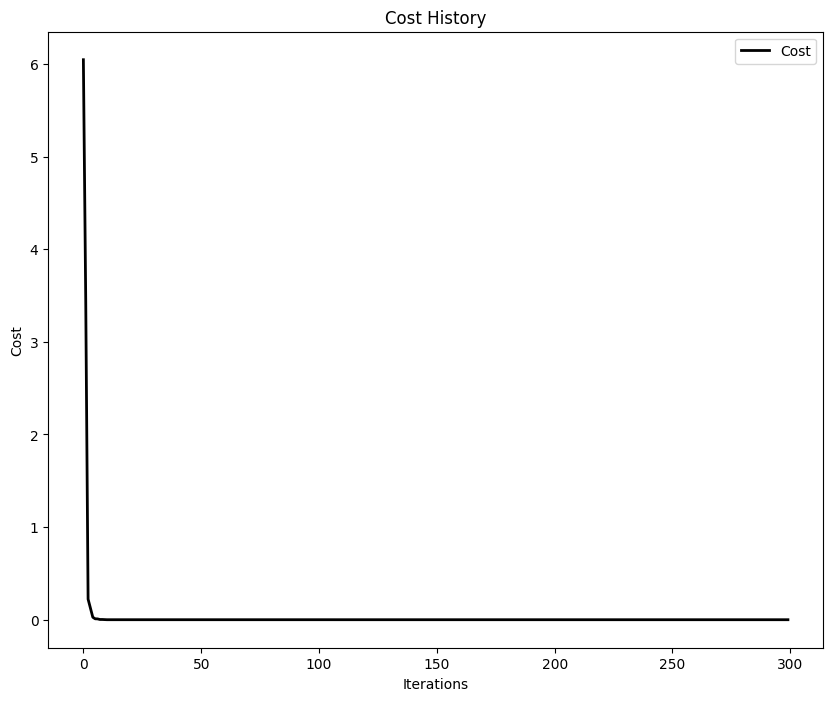

In [5]:
# Plot the cost over Iterations
cost_plot = plot_cost_history(cost_history = optimizer.cost_history)

2024-09-16 23:01:16,510 - matplotlib.animation - WARNING - MovieWriter ffmpeg unavailable; using Pillow instead.
2024-09-16 23:01:16,512 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


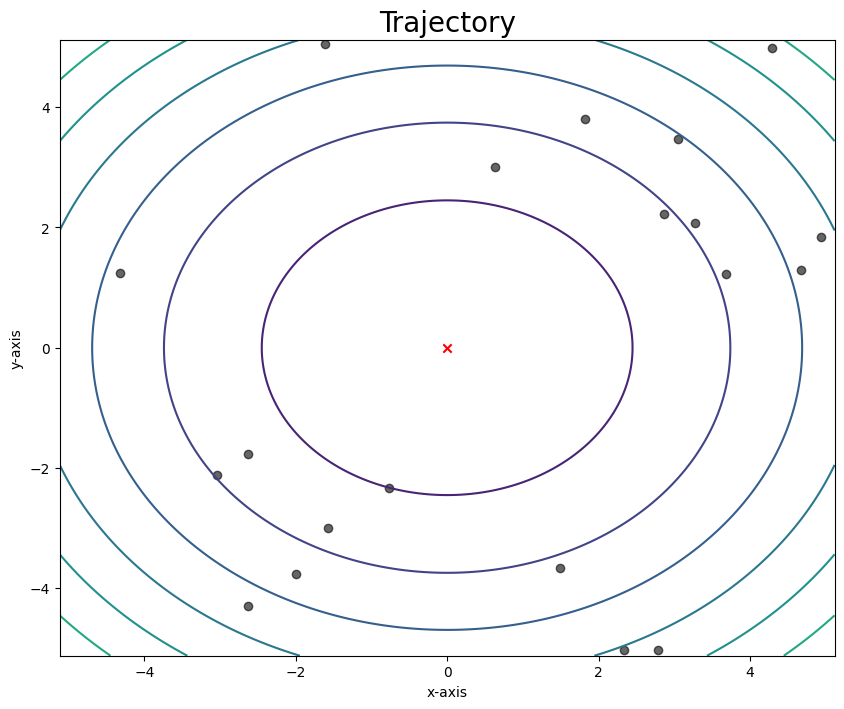

In [6]:
# Create a Mesher
m = Mesher(func=sphere,
           limits=[(-5.12, 5.12), (-5.12, 5.12)], 
           levels=np.arange(-2, 80.0, 8))

# Create a Designer
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)], 
             label=['x-axis', 'y-axis'],
             title_fontsize=20)

# Create an Animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0),
                         designer = d)

# Save the animation
animation.save('./Particle Searches/SphereParticlesSearch.gif', fps=30)

---
<div align="center">

## Rastringin Function
</div>

---

In [7]:
# Create a new instance of a Optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=config['n_particles'], dimensions=config['d'], options=config, bounds=lim)

# Perform Optimization
cost, pos = optimizer.optimize(rastrigin, iters=config['n_iterations'])

2024-09-16 23:02:10,171 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'d': 2, 'w': 0.5, 'c1': 1.5, 'c2': 0.8, 'n_particles': 20, 'n_iterations': 300}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████████████|300/300, best_cost=0
2024-09-16 23:02:10,777 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [-7.66102486e-11  4.00563676e-10]


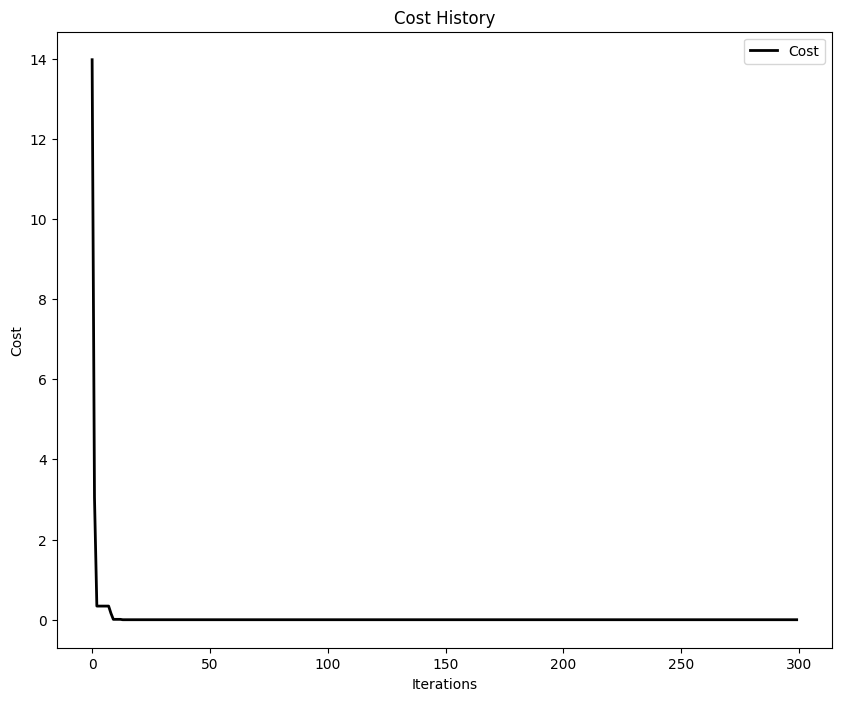

In [8]:
# Plot the cost over Iterations
cost_plot = plot_cost_history(cost_history = optimizer.cost_history)

2024-09-16 23:02:39,064 - matplotlib.animation - WARNING - MovieWriter ffmpeg unavailable; using Pillow instead.
2024-09-16 23:02:39,066 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


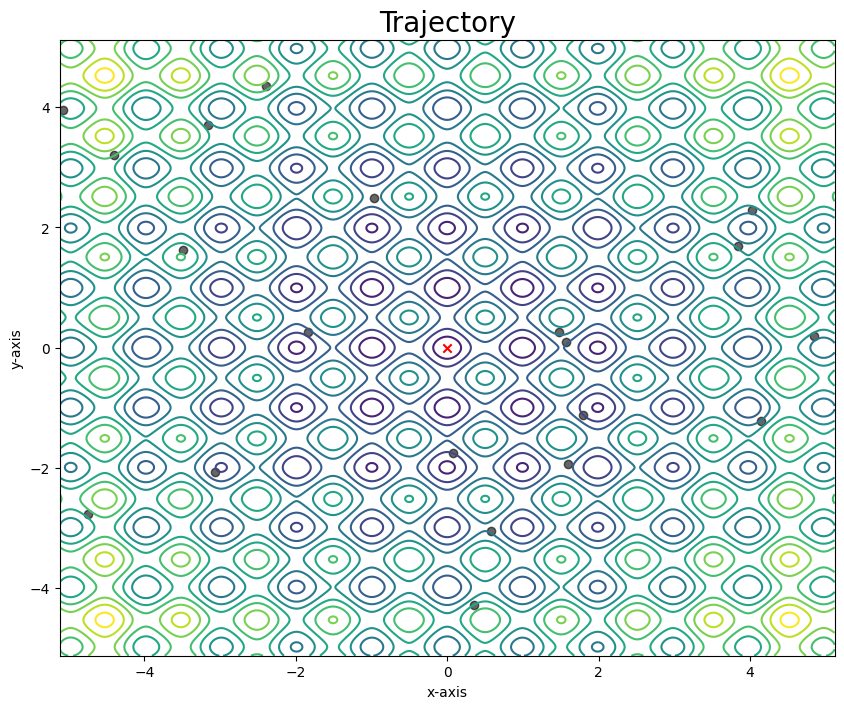

In [9]:
# Create a Mesher
m = Mesher(func=rastrigin,
           limits=[(-5.12, 5.12), (-5.12, 5.12)], 
           levels=np.arange(-2, 80.0, 8))

# Create a Designer
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)], 
             label=['x-axis', 'y-axis'],
             title_fontsize=20)

# Create an Animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0),
                         designer = d)

# Save the animation
animation.save('./Particle Searches/RastriginParticlesSearch.gif', fps=30)

---
<div align="center">

## Rosenbrock Function
</div>

---

In [10]:
# Create a new instance of a Optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=config['n_particles'], dimensions=config['d'], options=config, bounds=lim)

# Perform Optimization
cost, pos = optimizer.optimize(rosenbrock, iters=config['n_iterations'])

2024-09-16 23:06:26,078 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'d': 2, 'w': 0.5, 'c1': 1.5, 'c2': 0.8, 'n_particles': 20, 'n_iterations': 300}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|300/300, best_cost=0.000186
2024-09-16 23:06:27,270 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00018640261720456736, best pos: [0.98635344 0.97285139]


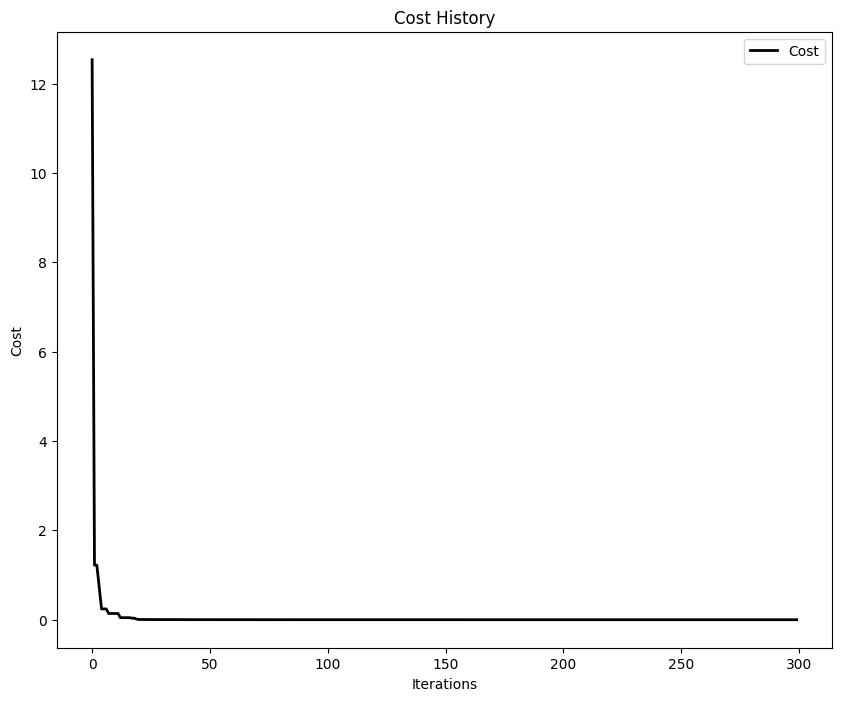

In [11]:
# Plot the cost over Iterations
cost_plot = plot_cost_history(cost_history = optimizer.cost_history)

2024-09-16 23:06:55,652 - matplotlib.animation - WARNING - MovieWriter ffmpeg unavailable; using Pillow instead.
2024-09-16 23:06:55,655 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


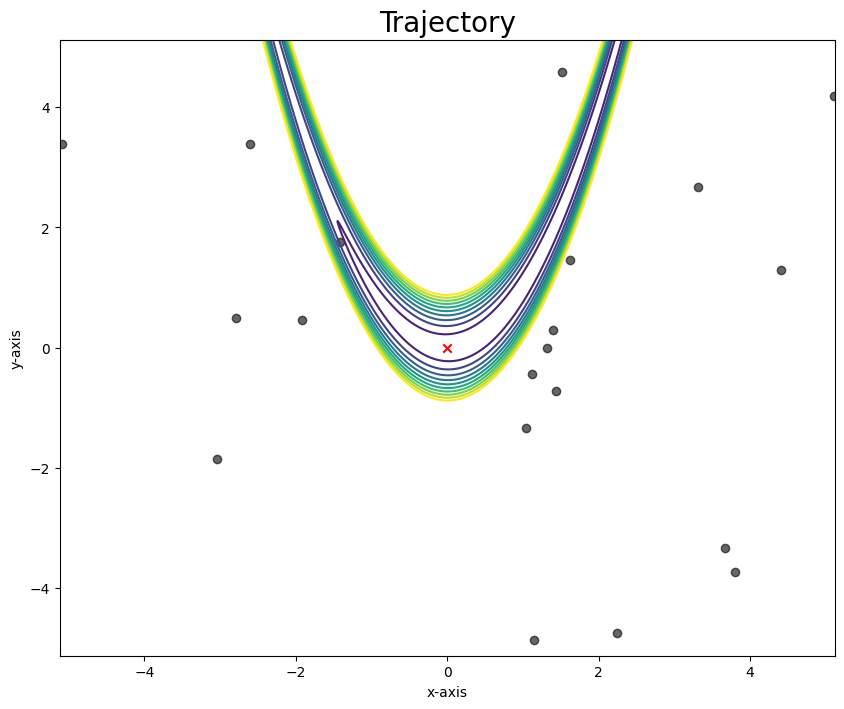

In [12]:
# Create a Mesher
m = Mesher(func=rosenbrock,
           limits=[(-5.12, 5.12), (-5.12, 5.12)], 
           levels=np.arange(-2, 80.0, 8))

# Create a Designer
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)], 
             label=['x-axis', 'y-axis'],
             title_fontsize=20)

# Create an Animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0),
                         designer = d)

# Save the animation
animation.save('./Particle Searches/RosenbrockParticlesSearch.gif', fps=30)

---

2024-09-16 23:12:01,301 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|300/300, best_cost=1.26e-10
2024-09-16 23:12:01,836 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2620380819384348e-10, best pos: [1.00001082 1.00002134]


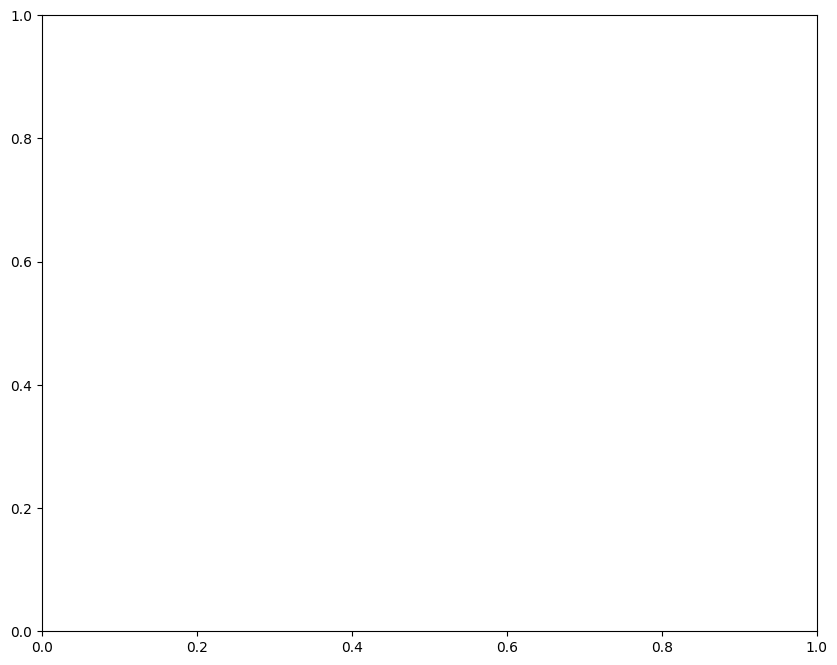

In [14]:
import pyswarms as ps

from pyswarms.utils.plotters import plot_surface
from pyswarms.utils.plotters.formatters import Mesher

# Run optimizer
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
cost, pos = optimizer.optimize(rosenbrock, iters=config['n_iterations'])

# Prepare position history
m = Mesher(func=rosenbrock)
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

# Plot!
plot_surface(pos_history_3d)